# IndiaPulse
Full project with explanations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load datasets

In [4]:
df = pd.read_csv('chart.csv')
df1 = pd.read_csv('cpi.csv')
df2 = pd.read_csv('diesel.csv')
df3 = pd.read_csv('petrol.csv')
df4 = pd.read_csv('USD vs INR.csv')
df5 = pd.read_csv('reporate.csv')

## Convert dates and set index

In [5]:
df['DateTime']=pd.to_datetime(df['DateTime']); df=df.set_index('DateTime')[['NIFTY 50']]
df1['observation_date']=pd.to_datetime(df1['observation_date']); df1=df1.set_index('observation_date')[['INDCPIALLMINMEI']]
df2['date']=pd.to_datetime(df2['date']); df2=df2.set_index('date')[['rate']]
df3['date']=pd.to_datetime(df3['date']); df3=df3.set_index('date')[['rate']]
df4['observation_date']=pd.to_datetime(df4['observation_date']); df4=df4.set_index('observation_date')[['CCUSMA02INM618N']]

## Fix Repo rate

In [6]:
df5.columns=['Date','Repo']
df5['Date']=pd.to_datetime(df5['Date'],errors='coerce')
df5=df5.dropna().set_index('Date')

C:\Users\asus\AppData\Local\Temp\ipykernel_1856\1352320951.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df5['Date']=pd.to_datetime(df5['Date'],errors='coerce')


## Monthly resample

In [7]:
dfm=df.resample('M').mean(); df1m=df1.resample('M').mean(); df2m=df2.resample('M').mean(); df3m=df3.resample('M').mean(); df4m=df4.resample('M').mean(); df5m=df5.resample('M').ffill()

C:\Users\asus\AppData\Local\Temp\ipykernel_1856\3595455408.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfm=df.resample('M').mean(); df1m=df1.resample('M').mean(); df2m=df2.resample('M').mean(); df3m=df3.resample('M').mean(); df4m=df4.resample('M').mean(); df5m=df5.resample('M').ffill()
C:\Users\asus\AppData\Local\Temp\ipykernel_1856\3595455408.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfm=df.resample('M').mean(); df1m=df1.resample('M').mean(); df2m=df2.resample('M').mean(); df3m=df3.resample('M').mean(); df4m=df4.resample('M').mean(); df5m=df5.resample('M').ffill()
C:\Users\asus\AppData\Local\Temp\ipykernel_1856\3595455408.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfm=df.resample('M').mean(); df1m=df1.resample('M').mean(); df2m=df2.resample('M').mean(); df3m=df3.resample('M').mean(); df4m=df4.res

# Monthly resample

In [10]:
dfm  = df.resample("M").mean()
df1m = df1.resample("M").mean()
df2m = df2.resample("M").mean()
df3m = df3.resample("M").mean()
df4m = df4.resample("M").mean()
df5m = df5.resample("M").ffill()


C:\Users\asus\AppData\Local\Temp\ipykernel_1856\3307726307.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfm  = df.resample("M").mean()
C:\Users\asus\AppData\Local\Temp\ipykernel_1856\3307726307.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df1m = df1.resample("M").mean()
C:\Users\asus\AppData\Local\Temp\ipykernel_1856\3307726307.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2m = df2.resample("M").mean()
C:\Users\asus\AppData\Local\Temp\ipykernel_1856\3307726307.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df3m = df3.resample("M").mean()
C:\Users\asus\AppData\Local\Temp\ipykernel_1856\3307726307.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df4m = df4.resample("M").mean()
C:\Users\as

# Rename columns

In [11]:
dfm.columns  = ["NIFTY"]
df1m.columns = ["CPI"]
df2m.columns = ["Diesel"]
df3m.columns = ["Petrol"]
df4m.columns = ["USDINR"]
df5m.columns = ["Repo"]


# Create IndiaPulse master

In [15]:
india = dfm.join([df1m, df2m, df3m, df4m, df5m])
india = india.dropna()
india.head()


,NIFTY,CPI,Diesel,Petrol,USDINR,Repo
DateTime,,,,,,


## Rename and merge

In [ ]:
dfm.columns=['NIFTY']; df1m.columns=['CPI']; df2m.columns=['Diesel']; df3m.columns=['Petrol']; df4m.columns=['USDINR']; df5m.columns=['Repo']
india=dfm.join([df1m,df2m,df3m,df4m,df5m]).dropna()

## Feature engineering

In [16]:
india['Inflation_MoM']=india['CPI'].pct_change()*100
india['Fuel_MoM']=((india['Petrol']+india['Diesel'])/2).pct_change()*100
india['NIFTY_Return']=india['NIFTY'].pct_change()*100
india['USD_Change']=india['USDINR'].pct_change()*100

In [19]:
india = india.loc["2010-01-01":"2023-12-31"]
india = india.dropna()

india.shape


(0, 10)

## Heatmap

c:\Users\asus\AppData\Local\Programs\Python\Python314\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\asus\AppData\Local\Programs\Python\Python314\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


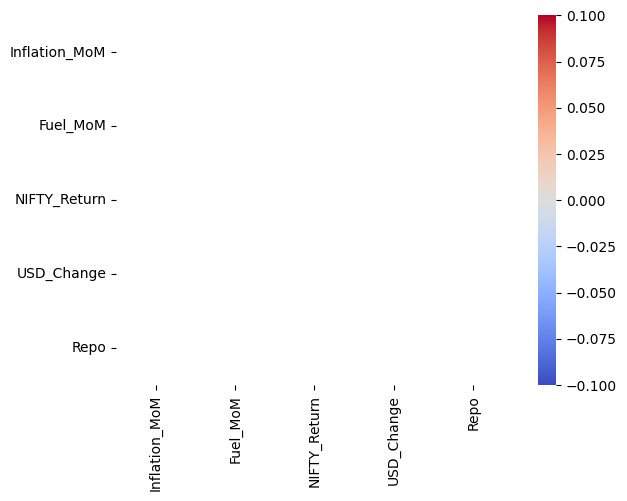

In [20]:
sns.heatmap(
    india[["Inflation_MoM","Fuel_MoM","NIFTY_Return","USD_Change","Repo"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.show()


In [21]:
inflation = df1m.join([df2m, df3m, df5m])
inflation = inflation.dropna()


In [23]:
market = dfm.join([df4m, df5m])
market = market.dropna()


In [24]:
market = dfm.join([df4m, df5m]).dropna()
market.head(), market.shape


(              NIFTY     USDINR  Repo
 DateTime                            
 2025-12-31  26129.6  90.020137  5.25,
 (1, 3))

In [25]:
inflation = df1m.join([df2m, df3m, df5m]).dropna()
inflation.head(), inflation.shape


(                       CPI     Diesel     Petrol Repo
 observation_date                                     
 2016-04-30        103.6659  49.685294  64.201818  6.5
 2016-05-31        105.1960  52.356111  65.012000  6.5
 2016-06-30        105.9611  55.937778  68.258000  6.5
 2016-07-31        107.1087  55.938571  66.196000  6.5
 2016-08-31        106.3436  52.761471  63.140000  6.5,
 (56, 4))

In [26]:
inflation["Inflation_MoM"] = inflation["CPI"].pct_change() * 100
inflation["Fuel_MoM"] = ((inflation["Petrol"] + inflation["Diesel"]) / 2).pct_change() * 100


In [27]:
inflation[["Inflation_MoM","Fuel_MoM","Repo"]].corr()


,Inflation_MoM,Fuel_MoM,Repo
Inflation_MoM,1.000000,0.024351,0.009237
Fuel_MoM,0.024351,1.000000,-0.105104
Repo,0.009237,-0.105104,1.000000


In [28]:
inflation["Fuel_Lag2"] = inflation["Fuel_MoM"].shift(2)
inflation[["Inflation_MoM","Fuel_Lag2"]].corr()


,Inflation_MoM,Fuel_Lag2
Inflation_MoM,1.00000,0.00624
Fuel_Lag2,0.00624,1.00000


# Build the two economic systems

## Inflation system

In [29]:
inflation = df1m.join([df2m, df3m, df5m]).dropna()
inflation.columns = ["CPI", "Diesel", "Petrol", "Repo"]
inflation.head()


,CPI,Diesel,Petrol,Repo
observation_date,,,,
2016-04-30,103.6659,49.685294,64.201818,6.5
2016-05-31,105.1960,52.356111,65.012000,6.5
2016-06-30,105.9611,55.937778,68.258000,6.5
2016-07-31,107.1087,55.938571,66.196000,6.5
2016-08-31,106.3436,52.761471,63.140000,6.5


## Market system

In [30]:
market = dfm.join([df4m, df5m]).dropna()
market.columns = ["NIFTY", "USDINR", "Repo"]
market.head()


,NIFTY,USDINR,Repo
DateTime,,,
2025-12-31,26129.6,90.020137,5.25


# Create economic indicators

## Inflation Engine 

In [31]:
inflation["Inflation_MoM"] = inflation["CPI"].pct_change() * 100
inflation["Fuel_MoM"] = ((inflation["Petrol"] + inflation["Diesel"]) / 2).pct_change() * 100


## Market Engine

In [32]:
market["NIFTY_Return"] = market["NIFTY"].pct_change() * 100
market["USD_Change"] = market["USDINR"].pct_change() * 100


# What drives inflation?

In [33]:
inflation[["Inflation_MoM","Fuel_MoM","Repo"]].corr()


,Inflation_MoM,Fuel_MoM,Repo
Inflation_MoM,1.000000,0.024351,0.009237
Fuel_MoM,0.024351,1.000000,-0.105104
Repo,0.009237,-0.105104,1.000000


# Lag analysis (real economics)

In [34]:
inflation["Fuel_Lag3"] = inflation["Fuel_MoM"].shift(3)
inflation[["Inflation_MoM","Fuel_Lag3"]].corr()


,Inflation_MoM,Fuel_Lag3
Inflation_MoM,1.000000,-0.095142
Fuel_Lag3,-0.095142,1.000000


# Long-term trend

In [35]:
inflation["CPI_MA6"] = inflation["CPI"].rolling(6).mean()
inflation["Fuel_MA6"] = ((inflation["Petrol"] + inflation["Diesel"]) / 2).rolling(6).mean()

inflation[["CPI_MA6","Fuel_MA6"]].corr()


,CPI_MA6,Fuel_MA6
CPI_MA6,1.000000,0.741142
Fuel_MA6,0.741142,1.000000


# Market vs Dollar

In [36]:
market[["NIFTY_Return","USD_Change","Repo"]].corr()


,NIFTY_Return,USD_Change,Repo
NIFTY_Return,NaN,NaN,NaN
USD_Change,NaN,NaN,NaN
Repo,NaN,NaN,NaN


# Visual Intelligence (this makes it impressive)

## Fuel vs Inflation

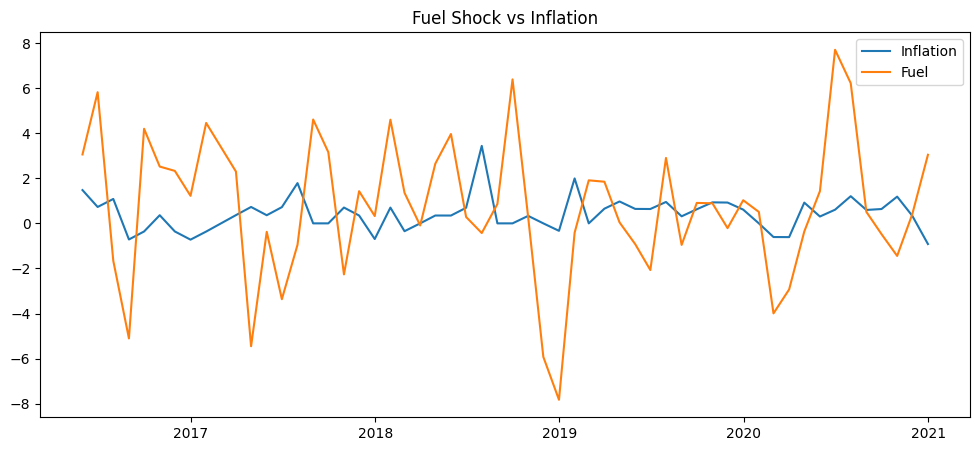

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(inflation.index, inflation["Inflation_MoM"], label="Inflation")
plt.plot(inflation.index, inflation["Fuel_MoM"], label="Fuel")
plt.legend()
plt.title("Fuel Shock vs Inflation")
plt.show()


## RBI vs Inflation

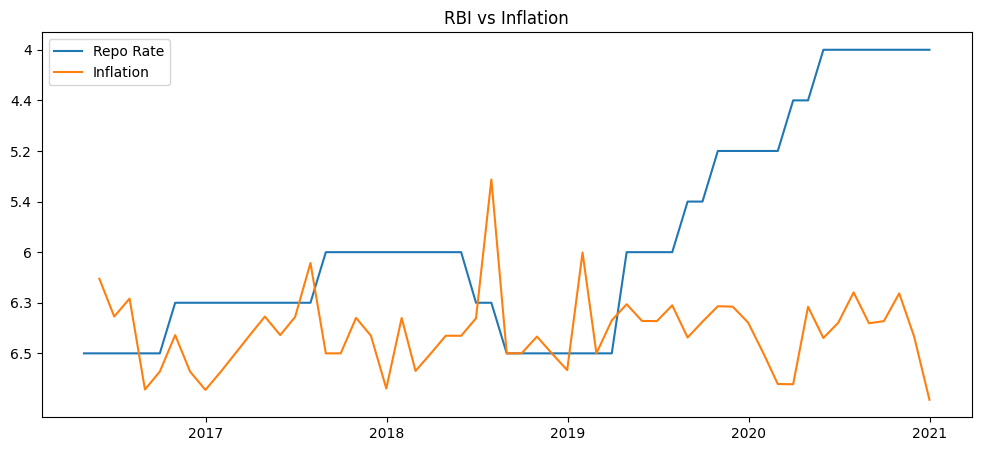

In [38]:
plt.figure(figsize=(12,5))
plt.plot(inflation.index, inflation["Repo"], label="Repo Rate")
plt.plot(inflation.index, inflation["Inflation_MoM"], label="Inflation")
plt.legend()
plt.title("RBI vs Inflation")
plt.show()


## Dollar vs NIFTY

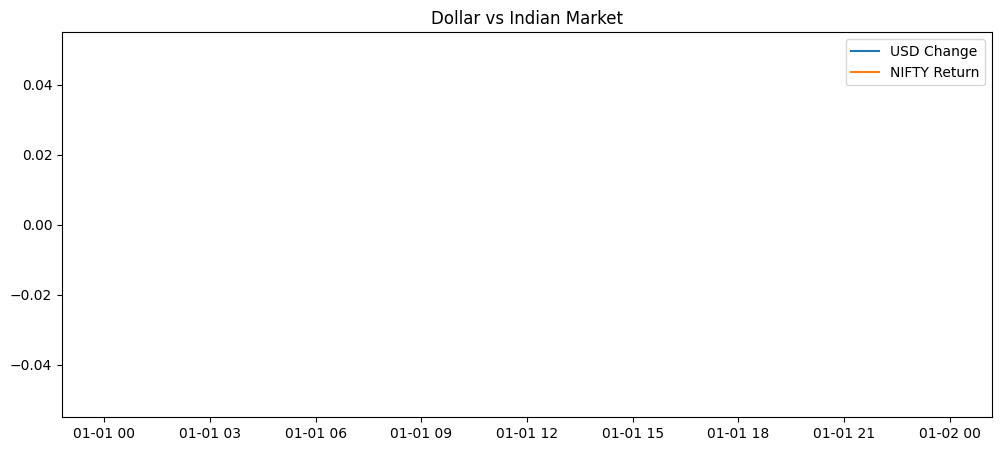

In [39]:
plt.figure(figsize=(12,5))
plt.plot(market.index, market["USD_Change"], label="USD Change")
plt.plot(market.index, market["NIFTY_Return"], label="NIFTY Return")
plt.legend()
plt.title("Dollar vs Indian Market")
plt.show()


# Create Z-Scores for Inflation Engine

In [40]:
inflation["Inflation_Z"] = (
    inflation["Inflation_MoM"] - inflation["Inflation_MoM"].mean()
) / inflation["Inflation_MoM"].std()

inflation["Fuel_Z"] = (
    inflation["Fuel_MoM"] - inflation["Fuel_MoM"].mean()
) / inflation["Fuel_MoM"].std()


# Find crisis months

In [41]:
inflation["Inflation_Shock"] = inflation["Inflation_Z"].abs() > 2
inflation["Fuel_Shock"] = inflation["Fuel_Z"].abs() > 2

inflation[inflation["Inflation_Shock"] | inflation["Fuel_Shock"]].head(10)


,CPI,Diesel,Petrol,Repo,Inflation_MoM,Fuel_MoM,Fuel_Lag3,CPI_MA6,Fuel_MA6,Inflation_Z,Fuel_Z,Inflation_Shock,Fuel_Shock
observation_date,,,,,,,,,,,,,
2018-07-31,115.1419,69.851091,79.801475,6.3,3.436508,-0.429494,2.647773,111.125283,72.915733,3.998019,-0.357889,True,False
2018-11-30,115.5244,72.318587,79.147647,6.5,0.000000,-5.921790,0.859161,114.631833,76.994308,-0.568183,-2.115151,False,True
2018-12-31,115.1419,66.351994,73.262706,6.5,-0.331099,-7.824539,6.385277,115.269400,76.104026,-1.008125,-2.723937,False,True
2019-01-31,117.4370,66.091799,72.945692,6.5,1.993280,-0.413429,0.264163,115.651917,75.219436,2.080354,-0.352749,True,False
2020-06-30,127.0003,70.082324,79.303400,4,0.606011,7.699299,-2.929697,125.916483,70.895501,0.237044,2.242921,False,True


# India Economic Stress Index

In [42]:
inflation["Stress_Index"] = (
    inflation["Inflation_Z"].abs() +
    inflation["Fuel_Z"].abs()
)

#Higher = worse economy.

#This is your IndiaPulse Index.

# Plot India’s economic stress

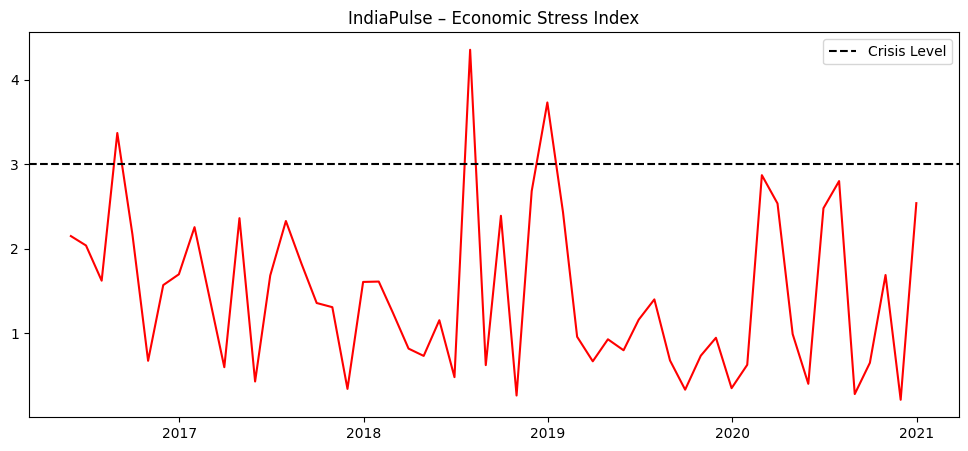

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(inflation.index, inflation["Stress_Index"], color="red")
plt.title("IndiaPulse – Economic Stress Index")
plt.axhline(3, linestyle="--", color="black", label="Crisis Level")
plt.legend()
plt.show()
